#  ICC-t20_WorldCup2021

In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# Data Extraction

In [2]:
df = pd.read_csv('../input/icct20-worldcup2021/kaggle_data.csv')

In [3]:
df.shape

(33, 24)

In [4]:
df.head()

,Unnamed: 0,team_1,team_2,stage,Winner_toss,Toss_descision,time,venue,avg_temperature,best_bowler,...,best_bowler_country,best_batter,batting_hand,high_indvidual_scores,strike_rate,best_batter_team,target,target_achieved,Player_of_the_match,Winner
0,Match_1,Australia,SouthAfrica,Group_stage,Australia,Fielding,afternoon,Abu_Dhabi,30,Josh_Hazlewood,...,Australia,Aiden_Markram,Right,40,111.10,SouthAfrica,119,1,Josh_Hazlewood,Australia
1,Match_2,England,Windies,Group_stage,England,Fielding,evening,Dubai,33,Adil_Rashid,...,England,Jos_Buttler,Right,24,109.10,England,56,1,Moeen_Ali,England
2,Match_3,Srilanka,Bangladesh,Group_stage,Srilanka,Fielding,afternoon,Sharjah,34,Shakib_al_Hassan,...,Bangladesh,Charith_Asalanka,Left,80,163.20,Srilanka,172,1,Charith_Asalanka,Srilanka
3,Match_4,Pakistan,India,Group_stage,Pakistan,Fielding,evening,Dubai,34,Shaheen_shah,...,Pakistan,Muhammad_Rizwan,Right,79,143.60,Pakistan,152,1,Shaheen_shah,Pakistan
4,Match_5,Afghanistan,Scotland,Group_stage,Afghanistan,Batting,evening,Sharjah,33,Mujeeb_ur_Rehman,...,Afghanistan,Najibullah_Zadran,Left,59,173.53,Afghanistan,191,0,Mujeeb_ur_Rehman,Afghanistan


In [5]:
#rename attribute
df = df.rename(columns = {'Unnamed: 0' : 'Match Number'})
df.head()

,Match Number,team_1,team_2,stage,Winner_toss,Toss_descision,time,venue,avg_temperature,best_bowler,...,best_bowler_country,best_batter,batting_hand,high_indvidual_scores,strike_rate,best_batter_team,target,target_achieved,Player_of_the_match,Winner
0,Match_1,Australia,SouthAfrica,Group_stage,Australia,Fielding,afternoon,Abu_Dhabi,30,Josh_Hazlewood,...,Australia,Aiden_Markram,Right,40,111.10,SouthAfrica,119,1,Josh_Hazlewood,Australia
1,Match_2,England,Windies,Group_stage,England,Fielding,evening,Dubai,33,Adil_Rashid,...,England,Jos_Buttler,Right,24,109.10,England,56,1,Moeen_Ali,England
2,Match_3,Srilanka,Bangladesh,Group_stage,Srilanka,Fielding,afternoon,Sharjah,34,Shakib_al_Hassan,...,Bangladesh,Charith_Asalanka,Left,80,163.20,Srilanka,172,1,Charith_Asalanka,Srilanka
3,Match_4,Pakistan,India,Group_stage,Pakistan,Fielding,evening,Dubai,34,Shaheen_shah,...,Pakistan,Muhammad_Rizwan,Right,79,143.60,Pakistan,152,1,Shaheen_shah,Pakistan
4,Match_5,Afghanistan,Scotland,Group_stage,Afghanistan,Batting,evening,Sharjah,33,Mujeeb_ur_Rehman,...,Afghanistan,Najibullah_Zadran,Left,59,173.53,Afghanistan,191,0,Mujeeb_ur_Rehman,Afghanistan


In [6]:
#indexing match number
df = df.set_index('Match Number')
df.head()

,team_1,team_2,stage,Winner_toss,Toss_descision,time,venue,avg_temperature,best_bowler,bowling_arm,...,best_bowler_country,best_batter,batting_hand,high_indvidual_scores,strike_rate,best_batter_team,target,target_achieved,Player_of_the_match,Winner
Match Number,,,,,,,,,,,,,,,,,,,,,
Match_1,Australia,SouthAfrica,Group_stage,Australia,Fielding,afternoon,Abu_Dhabi,30,Josh_Hazlewood,Right,...,Australia,Aiden_Markram,Right,40,111.10,SouthAfrica,119,1,Josh_Hazlewood,Australia
Match_2,England,Windies,Group_stage,England,Fielding,evening,Dubai,33,Adil_Rashid,Right,...,England,Jos_Buttler,Right,24,109.10,England,56,1,Moeen_Ali,England
Match_3,Srilanka,Bangladesh,Group_stage,Srilanka,Fielding,afternoon,Sharjah,34,Shakib_al_Hassan,Left,...,Bangladesh,Charith_Asalanka,Left,80,163.20,Srilanka,172,1,Charith_Asalanka,Srilanka
Match_4,Pakistan,India,Group_stage,Pakistan,Fielding,evening,Dubai,34,Shaheen_shah,Left,...,Pakistan,Muhammad_Rizwan,Right,79,143.60,Pakistan,152,1,Shaheen_shah,Pakistan
Match_5,Afghanistan,Scotland,Group_stage,Afghanistan,Batting,evening,Sharjah,33,Mujeeb_ur_Rehman,Right,...,Afghanistan,Najibullah_Zadran,Left,59,173.53,Afghanistan,191,0,Mujeeb_ur_Rehman,Afghanistan


In [7]:
df.describe()

,avg_temperature,most_individual_wickets,economy,high_indvidual_scores,strike_rate,target,target_achieved
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,29.272727,2.878788,5.215758,62.393939,152.402121,146.606061,0.696970
std,2.577217,0.892944,2.187966,20.135385,33.999070,37.136521,0.466694
min,20.000000,1.000000,0.900000,24.000000,97.060000,56.000000,0.000000
25%,28.000000,2.000000,4.000000,45.000000,136.360000,125.000000,0.000000
50%,29.000000,3.000000,4.800000,65.000000,153.190000,152.000000,1.000000
75%,30.000000,3.000000,6.250000,79.000000,162.900000,173.000000,1.000000
max,34.000000,5.000000,12.000000,101.000000,263.160000,211.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Match_1 to Match_33
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   team_1                   33 non-null     object 
 1   team_2                   33 non-null     object 
 2   stage                    33 non-null     object 
 3   Winner_toss              33 non-null     object 
 4   Toss_descision           33 non-null     object 
 5   time                     33 non-null     object 
 6   venue                    33 non-null     object 
 7   avg_temperature          33 non-null     int64  
 8   best_bowler              33 non-null     object 
 9   bowling_arm              33 non-null     object 
 10  bowling_style            33 non-null     object 
 11  most_individual_wickets  33 non-null     int64  
 12  economy                  33 non-null     float64
 13  best_bowler_country      33 non-null     object 
 14  best_batter          

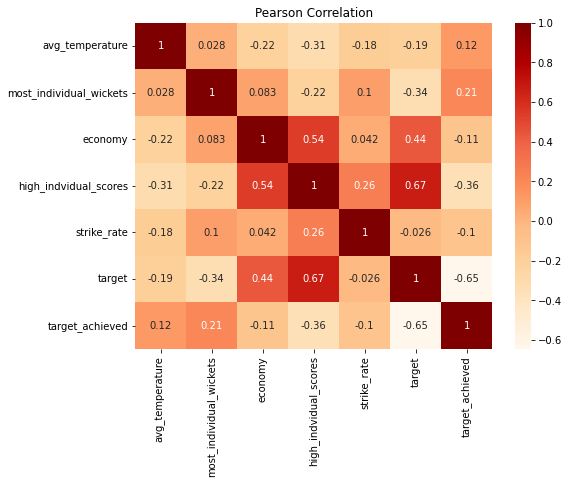

In [9]:
#heatmap correlation
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, cmap = 'OrRd')
plt.title("Pearson Correlation")
plt.show()

# Visualization

In [10]:
#transform data
df.target_achieved[df['target_achieved'] == 0] = 'Achieved'
df.target_achieved[df['target_achieved'] == 1] = 'Not Achieved'
df.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,team_1,team_2,stage,Winner_toss,Toss_descision,time,venue,avg_temperature,best_bowler,bowling_arm,...,best_bowler_country,best_batter,batting_hand,high_indvidual_scores,strike_rate,best_batter_team,target,target_achieved,Player_of_the_match,Winner
Match Number,,,,,,,,,,,,,,,,,,,,,
Match_1,Australia,SouthAfrica,Group_stage,Australia,Fielding,afternoon,Abu_Dhabi,30,Josh_Hazlewood,Right,...,Australia,Aiden_Markram,Right,40,111.10,SouthAfrica,119,Not Achieved,Josh_Hazlewood,Australia
Match_2,England,Windies,Group_stage,England,Fielding,evening,Dubai,33,Adil_Rashid,Right,...,England,Jos_Buttler,Right,24,109.10,England,56,Not Achieved,Moeen_Ali,England
Match_3,Srilanka,Bangladesh,Group_stage,Srilanka,Fielding,afternoon,Sharjah,34,Shakib_al_Hassan,Left,...,Bangladesh,Charith_Asalanka,Left,80,163.20,Srilanka,172,Not Achieved,Charith_Asalanka,Srilanka
Match_4,Pakistan,India,Group_stage,Pakistan,Fielding,evening,Dubai,34,Shaheen_shah,Left,...,Pakistan,Muhammad_Rizwan,Right,79,143.60,Pakistan,152,Not Achieved,Shaheen_shah,Pakistan
Match_5,Afghanistan,Scotland,Group_stage,Afghanistan,Batting,evening,Sharjah,33,Mujeeb_ur_Rehman,Right,...,Afghanistan,Najibullah_Zadran,Left,59,173.53,Afghanistan,191,Achieved,Mujeeb_ur_Rehman,Afghanistan


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


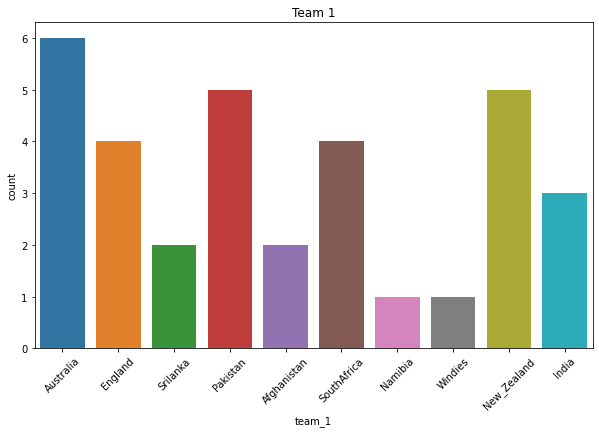

In [11]:
#visualize team 1
plt.figure(figsize = (10,6))
chart = sns.countplot(df['team_1'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title("Team 1")
plt.show()

In [12]:
#group team 1 & target achievement
team1_achieved = df.groupby(['team_1', 'target_achieved']).size().reset_index(name = 'Count')

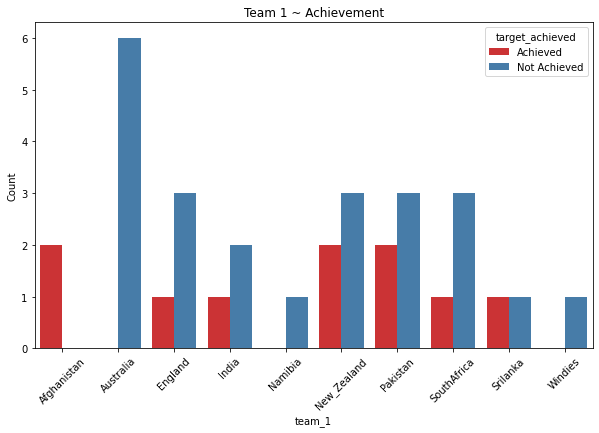

In [13]:
#visualize team 1 ~ target achieved
plt.figure(figsize = (10,6))
chart = sns.barplot(data = team1_achieved, x = 'team_1', y = 'Count', hue = 'target_achieved', palette = 'Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title("Team 1 ~ Achievement")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


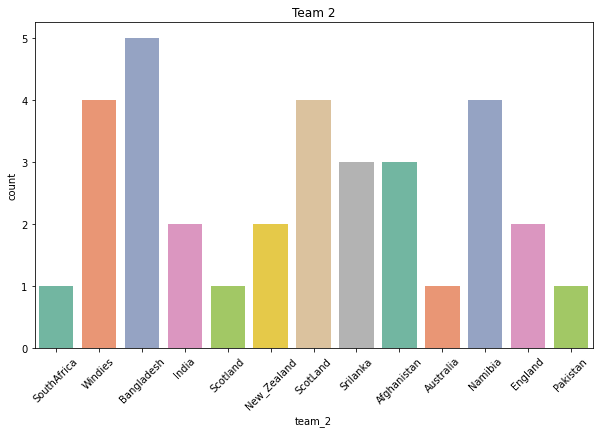

In [14]:
#visualize team 2
plt.figure(figsize = (10,6))
chart = sns.countplot(df['team_2'], palette = 'Set2')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title("Team 2")
plt.show()

In [15]:
#group team 2 & target achievement
team2_achieved = df.groupby(['team_2', 'target_achieved']).size().reset_index(name = 'Count')

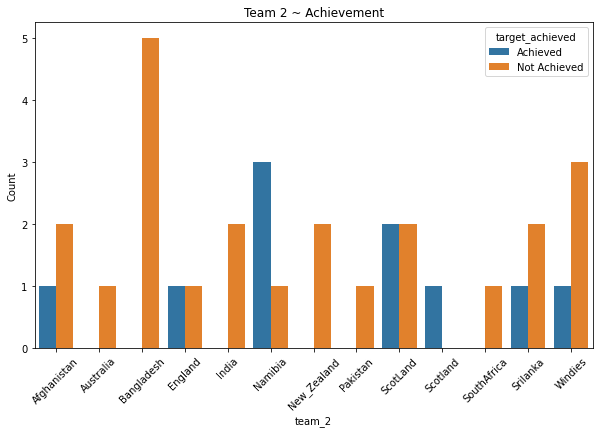

In [16]:
#visualize team 2 ~ target achieved
plt.figure(figsize = (10,6))
chart = sns.barplot(data = team2_achieved, x = 'team_2', y = 'Count', hue = 'target_achieved')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title("Team 2 ~ Achievement")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


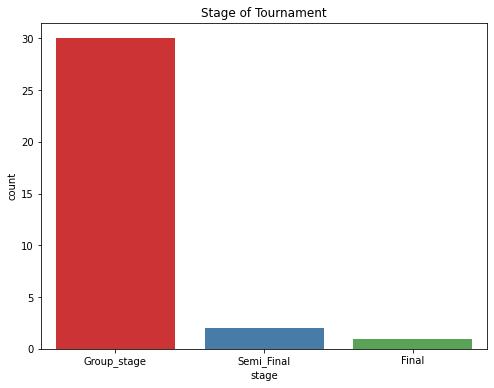

In [17]:
#visualize stage
plt.figure(figsize = (8,6))
sns.countplot(df['stage'], palette = 'Set1')
plt.title("Stage of Tournament")
plt.show()

In [18]:
#group stage & target achievement
stage_achieved = df.groupby(['stage', 'target_achieved']).size().reset_index(name = 'Count')

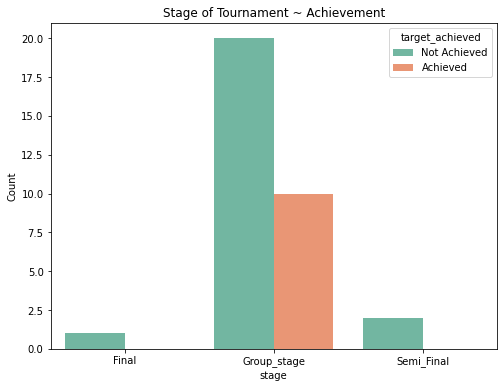

In [19]:
#visualize stage ~ target achieved
plt.figure(figsize = (8,6))
sns.barplot(data = stage_achieved, x = 'stage', y = 'Count', hue = 'target_achieved', palette = 'Set2')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title("Stage of Tournament ~ Achievement")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


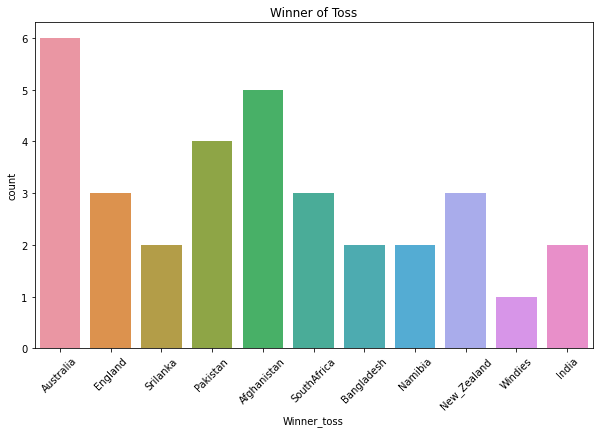

In [20]:
#visualize winner of toss
plt.figure(figsize = (10,6))
chart = sns.countplot(df['Winner_toss'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title("Winner of Toss")
plt.show()

In [21]:
#group winner toss & target achievement
winner_achieved = df.groupby(['Winner_toss', 'target_achieved']).size().reset_index(name = 'Count')

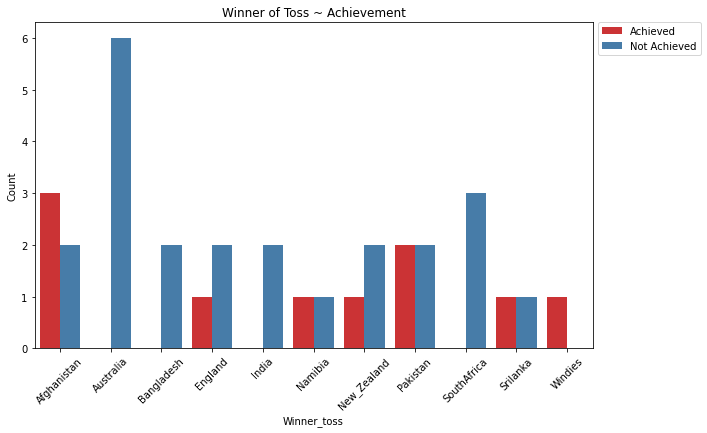

In [22]:
#visualize winner toss ~ target achieved
plt.figure(figsize = (10,6))
chart = sns.barplot(data = winner_achieved, x = 'Winner_toss', y = 'Count', hue = 'target_achieved', palette = 'Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title("Winner of Toss ~ Achievement")
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad = 0)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


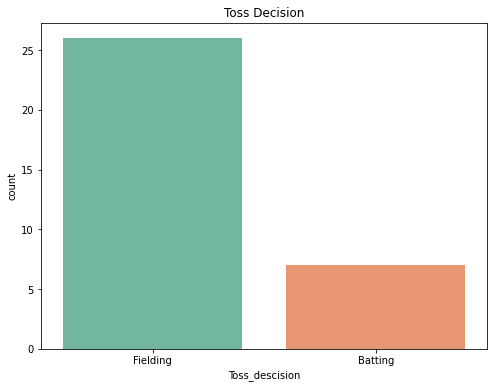

In [23]:
#visualize toss decision
plt.figure(figsize = (8,6))
sns.countplot(df['Toss_descision'], palette = 'Set2')
plt.title("Toss Decision")
plt.show()

In [24]:
#group winner toss decision & target achievement
toss_achieved = df.groupby(['Toss_descision', 'target_achieved']).size().reset_index(name = 'Count')

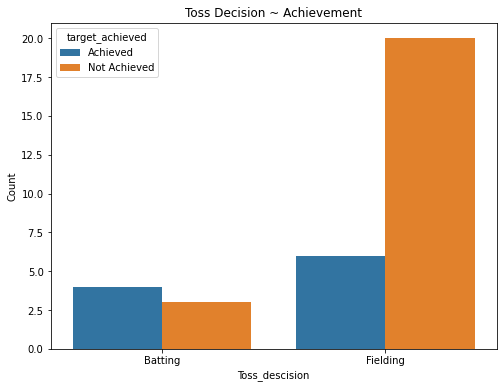

In [25]:
#visualize toss decision ~ target achieved
plt.figure(figsize = (8,6))
sns.barplot(data = toss_achieved, x = 'Toss_descision', y = 'Count', hue = 'target_achieved')
plt.title("Toss Decision ~ Achievement")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


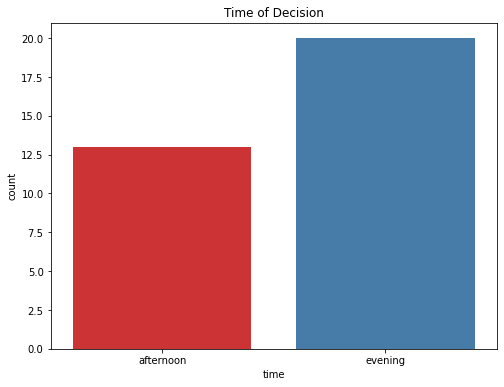

In [26]:
#visualize time
plt.figure(figsize = (8,6))
sns.countplot(df['time'], palette = 'Set1')
plt.title("Time of Decision")
plt.show()

In [27]:
#group time & target achievement
time_achieved = df.groupby(['time', 'target_achieved']).size().reset_index(name = 'Count')

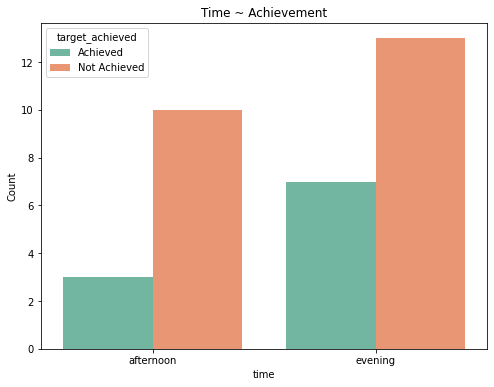

In [28]:
#visualize time ~ target achieved
plt.figure(figsize = (8,6))
sns.barplot(data = time_achieved, x = 'time', y = 'Count', hue = 'target_achieved', palette = 'Set2')
plt.title("Time ~ Achievement")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


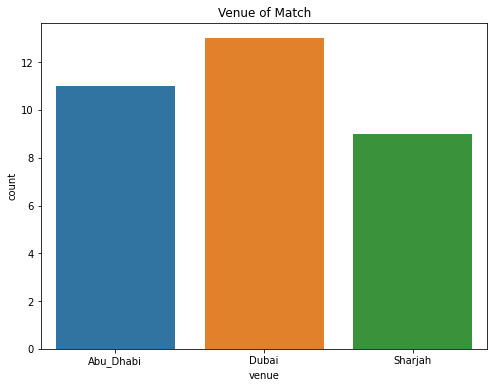

In [29]:
#visualize venue
plt.figure(figsize = (8,6))
sns.countplot(df['venue'])
plt.title("Venue of Match")
plt.show()

In [30]:
#group venue & target achievement
venue_achieved = df.groupby(['venue', 'target_achieved']).size().reset_index(name = 'Count')

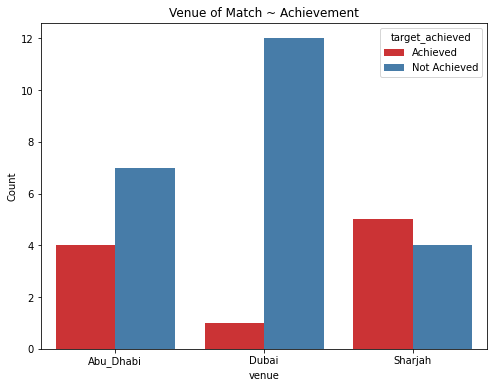

In [31]:
#visualize venue ~ target achieved
plt.figure(figsize = (8,6))
sns.barplot(data = venue_achieved, x = 'venue', y = 'Count', hue = 'target_achieved', palette = 'Set1')
plt.title("Venue of Match ~ Achievement")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


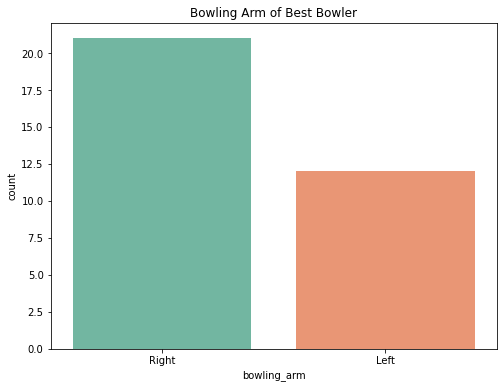

In [32]:
#visualize bowling arm
plt.figure(figsize = (8,6))
sns.countplot(df['bowling_arm'], palette = 'Set2')
plt.title("Bowling Arm of Best Bowler")
plt.show()

In [33]:
#group bowling arm & target achievement
bowling_achieved = df.groupby(['bowling_arm', 'target_achieved']).size().reset_index(name = 'Count')

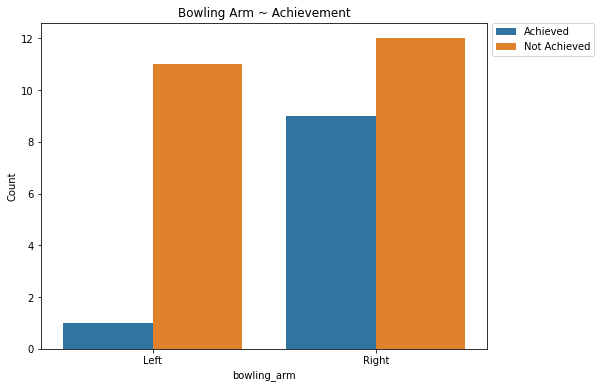

In [34]:
#visualize bowling arm ~ target achieved
plt.figure(figsize = (8,6))
sns.barplot(data = bowling_achieved, x = 'bowling_arm', y = 'Count', hue = 'target_achieved')
plt.title("Bowling Arm ~ Achievement")
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad = 0)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


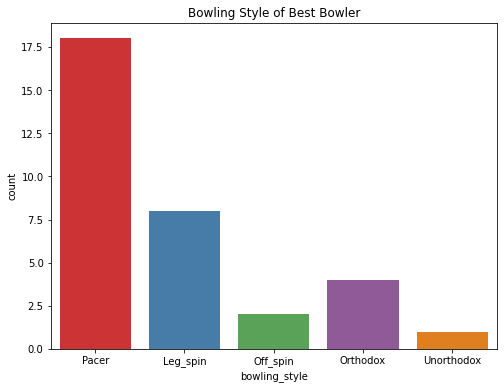

In [35]:
#visualize bowling style
plt.figure(figsize = (8,6))
sns.countplot(df['bowling_style'], palette = 'Set1')
plt.title("Bowling Style of Best Bowler")
plt.show()

In [36]:
#group bowling style & target achievement
style_achieved = df.groupby(['bowling_style', 'target_achieved']).size().reset_index(name = 'Count')

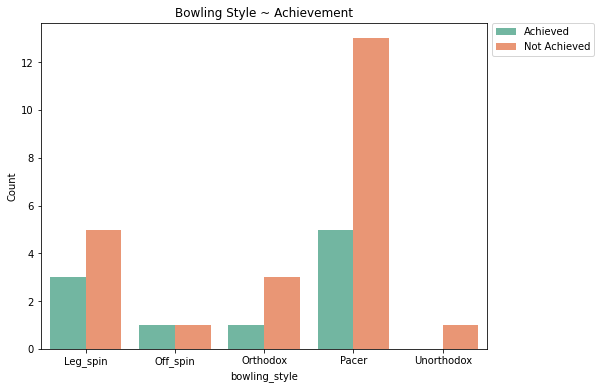

In [37]:
#visualize bowling arm ~ target achieved
plt.figure(figsize = (8,6))
sns.barplot(data = style_achieved, x = 'bowling_style', y = 'Count', hue = 'target_achieved', palette = 'Set2')
plt.title("Bowling Style ~ Achievement")
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad = 0)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


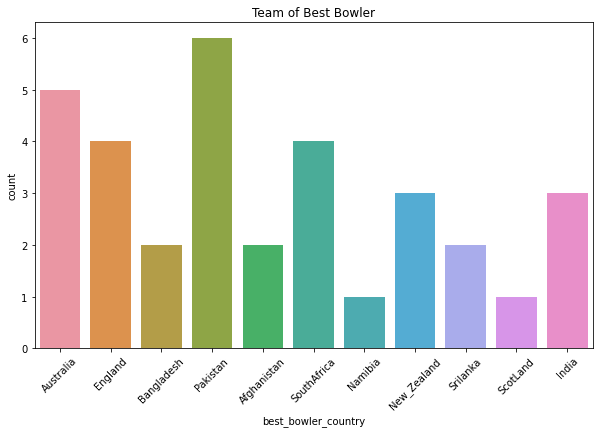

In [38]:
#visualize team best bowler country
plt.figure(figsize = (10,6))
chart = sns.countplot(df['best_bowler_country'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title("Team of Best Bowler")
plt.show()

In [39]:
#group team best bowler & target achievement
team_achieved = df.groupby(['best_bowler_country', 'target_achieved']).size().reset_index(name = 'Count')

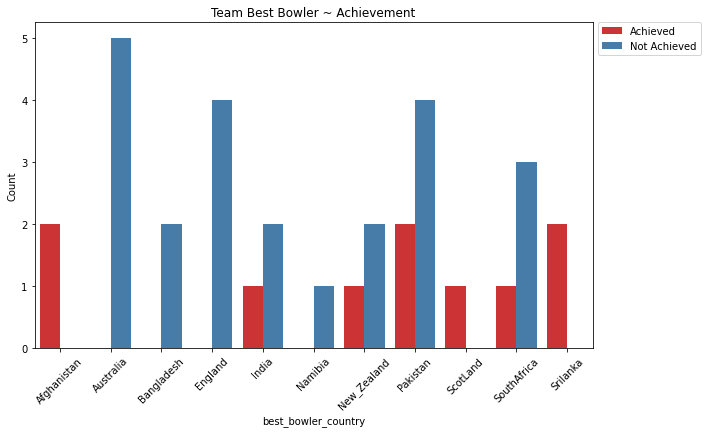

In [40]:
#visualize team best bowler ~ target achieved
plt.figure(figsize = (10,6))
chart = sns.barplot(data = team_achieved, x = 'best_bowler_country', y = 'Count', hue = 'target_achieved', palette = 'Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title("Team Best Bowler ~ Achievement")
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad = 0)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


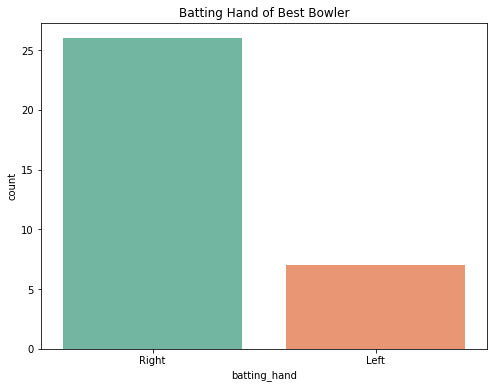

In [41]:
#visualize batting hand
plt.figure(figsize = (8,6))
sns.countplot(df['batting_hand'], palette = 'Set2')
plt.title("Batting Hand of Best Bowler")
plt.show()

In [42]:
#group batting hand & target achievement
batting_achieved = df.groupby(['batting_hand', 'target_achieved']).size().reset_index(name = 'Count')

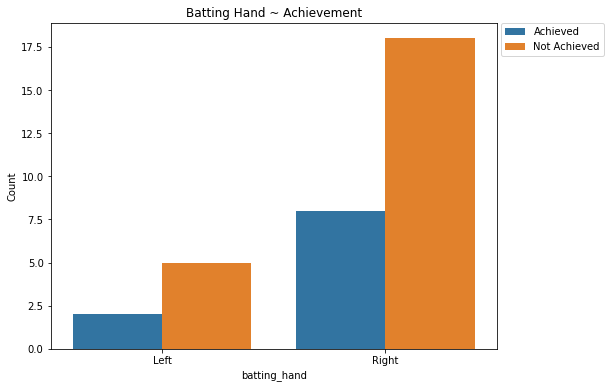

In [43]:
#visualize batting hand ~ target achieved
plt.figure(figsize = (8,6))
sns.barplot(data = batting_achieved, x = 'batting_hand', y = 'Count', hue = 'target_achieved')
plt.title("Batting Hand ~ Achievement")
plt.legend(bbox_to_anchor = (1.01, 1), borderaxespad = 0)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


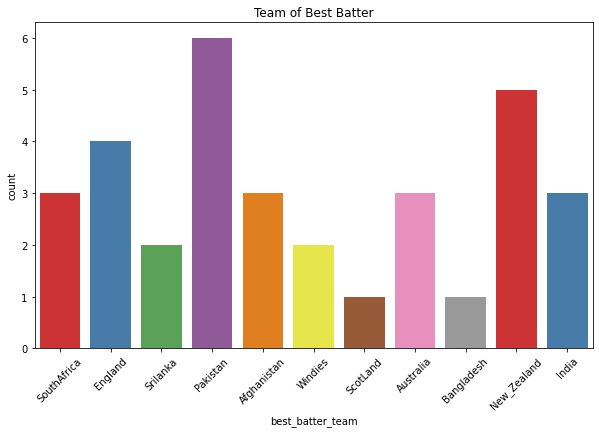

In [44]:
#visualize best batter team
plt.figure(figsize = (10,6))
chart = sns.countplot(df['best_batter_team'], palette = 'Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title("Team of Best Batter")
plt.show()

In [45]:
#group best batter team & target achievement
batter_achieved = df.groupby(['best_batter_team', 'target_achieved']).size().reset_index(name = 'Count')

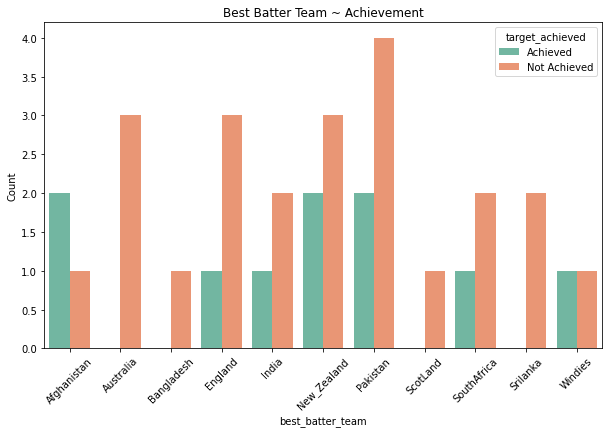

In [46]:
#visualize best batter team ~ target achieved
plt.figure(figsize = (10,6))
chart = sns.barplot(data = batter_achieved, x = 'best_batter_team', y = 'Count', hue = 'target_achieved', palette = 'Set2')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title("Best Batter Team ~ Achievement")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


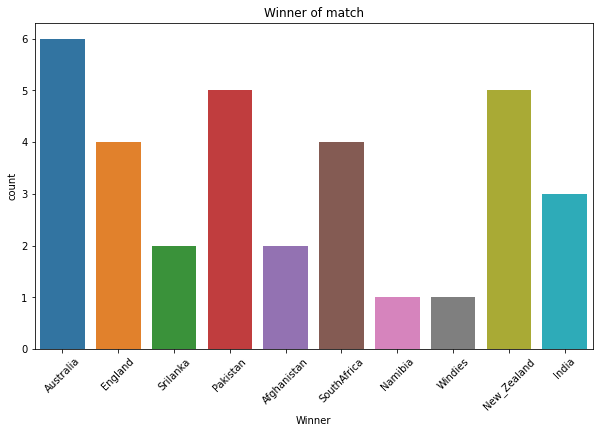

In [47]:
#visualize winner
plt.figure(figsize = (10,6))
chart = sns.countplot(df['Winner'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title("Winner of match")
plt.show()

In [48]:
#group winner & target achievement
winner_achieved = df.groupby(['Winner', 'target_achieved']).size().reset_index(name = 'Count')

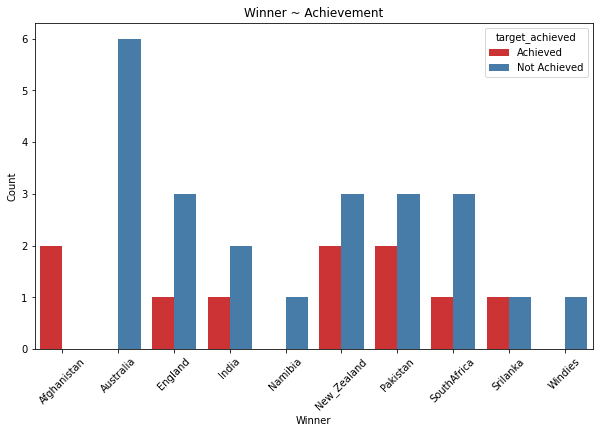

In [49]:
#visualize best batter team ~ target achieved
plt.figure(figsize = (10,6))
chart = sns.barplot(data = winner_achieved, x = 'Winner', y = 'Count', hue = 'target_achieved', palette = 'Set1')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title("Winner ~ Achievement")
plt.show()

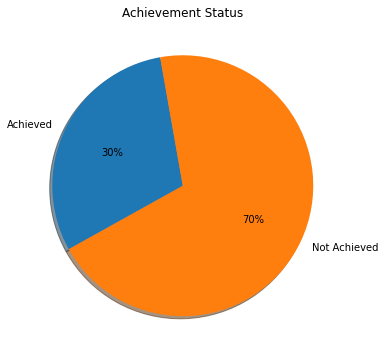

In [50]:
#visualize achievement status
plt.figure(figsize = (8,6))
status = [np.count_nonzero(df['target_achieved'] == 'Achieved'),
         np.count_nonzero(df['target_achieved'] == 'Not Achieved')]
activities = ['Achieved', 'Not Achieved']
plt.pie(status, labels = activities, startangle = 100, radius = 1, autopct = '%1.f%%', shadow = True)
plt.title("Achievement Status")
plt.show()

# Naive Bayes Model

In [51]:
#handling categorical data
for i in df.columns.tolist():
    df[i] = df[i].astype('category').cat.codes

df.head()

,team_1,team_2,stage,Winner_toss,Toss_descision,time,venue,avg_temperature,best_bowler,bowling_arm,...,best_bowler_country,best_batter,batting_hand,high_indvidual_scores,strike_rate,best_batter_team,target,target_achieved,Player_of_the_match,Winner
Match Number,,,,,,,,,,,,,,,,,,,,,
Match_1,1,10,1,1,1,0,0,5,9,1,...,1,1,1,4,5,8,6,1,12,1
Match_2,2,12,1,3,1,1,1,7,1,1,...,3,9,1,0,3,3,0,1,17,2
Match_3,8,2,1,9,1,0,2,8,19,0,...,2,3,0,21,25,9,21,1,3,8
Match_4,6,4,1,7,1,1,1,8,18,0,...,7,16,1,20,11,6,15,1,26,6
Match_5,0,9,1,0,0,1,2,7,13,1,...,0,17,0,11,27,0,25,0,19,0


In [52]:
#split data
X = df.drop('target_achieved', axis = 1)
y = df['target_achieved']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(23, 22)
(23,)
(10, 22)
(10,)


In [53]:
#build model
nb = GaussianNB()
%time nb.fit(X_train, y_train)
accuracy = nb.score(X_test, y_test)
print('Accuracy Score : ', int(accuracy * 100), '%')

CPU times: user 2.42 ms, sys: 125 µs, total: 2.54 ms
Wall time: 2.56 ms
Accuracy Score :  80 %


In [54]:
#prediction
y_pred = nb.predict(X_test)
print(y_pred)

[1 0 1 1 0 0 0 0 1 1]


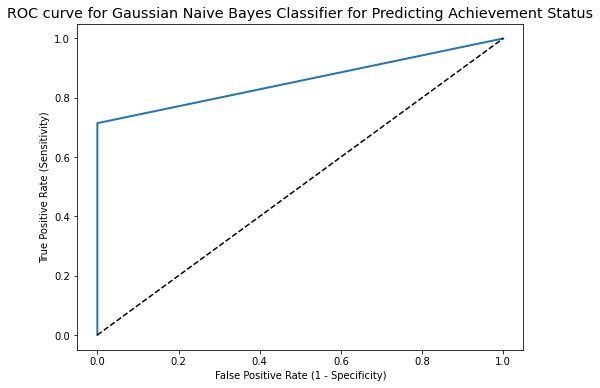

In [55]:
#visualize ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Achievement Status')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [56]:
#check of MSE & RMSE 
mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.2
Root Mean Squared Error : 0.4472135954999579


[[3 0]
 [2 5]]


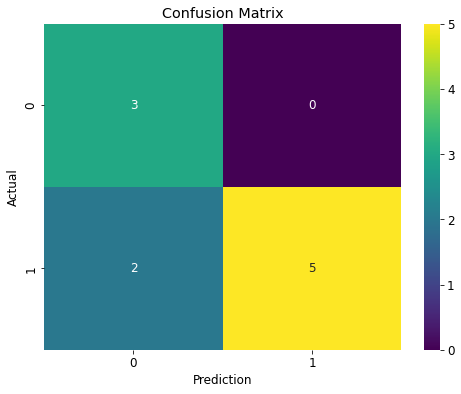

In [57]:
#confusion matrix
matrix = metrics.confusion_matrix(y_test, y_pred)
print(matrix)

#heatmap matrix
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = '.0f', cmap = 'viridis')
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [58]:
#check cross validation score
cvs = cross_val_score(nb, X_train, y_train, cv = 10, scoring = 'accuracy')
print('Cross-validation scores:{}'.format(cvs))

Cross-validation scores:[1.         0.66666667 0.66666667 0.5        1.         0.5
 1.         0.5        0.5        1.        ]


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [59]:
#compute Average cross-validation score
print('Average cross-validation score: {:.2f}'.format(cvs.mean()))

Average cross-validation score: 0.73


In [60]:
#classification report
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.71      0.83         7

    accuracy                           0.80        10
   macro avg       0.80      0.86      0.79        10
weighted avg       0.88      0.80      0.81        10

